In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [ ]:
data.head()

## Data Proprocessing

In [ ]:
data.shape

In [ ]:
data.duplicated().sum()

In [ ]:
data.isnull().sum()

## Text Preprocessing

In [31]:
import re
import string

In [32]:
data['tweet'].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

convert uppercase to lowercase

In [33]:
data["tweet"]=data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [34]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

remove links

In [35]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [36]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

Remove punctuations

In [37]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [39]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911         complet love new iphon emoji iphon appl emoj
7912    tune turn drop gtd one app mobil mind medit op...
7913    ok galaxi crash one day wait til monday skyroc...
7914    gain follow rt must follow follow back follow ...
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, dtype: object

remove numbers

In [40]:
data["tweet"] = data["tweet"].str.replace(r'\d+', '', regex=True)

In [41]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911         complet love new iphon emoji iphon appl emoj
7912    tune turn drop gtd one app mobil mind medit op...
7913    ok galaxi crash one day wait til monday skyroc...
7914    gain follow rt must follow follow back follow ...
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, dtype: object

remove stopwords

In [42]:
!pip install nltk

In [43]:
import nltk

In [44]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [46]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [47]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [48]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

Stemming

In [49]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [50]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [51]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [52]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


## Building Vocabulary

In [55]:
from collections import Counter
vocab = Counter()

In [57]:
vocab

Counter()

In [59]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [61]:
len(vocab)

15876

In [62]:
data.shape

(7920, 3)

In [63]:
tokens = [key for key in vocab if vocab[key] > 10]

In [64]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purcha',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batte

In [65]:
len(tokens)

1141

In [66]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Divide dataset

In [67]:
X = data['tweet']
y = data['label']

In [68]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/8.7 MB 3.3 MB/s eta 0:00:03
   --------- ------------------------------ 2.1/8.7 MB 3.6 MB/s eta 0:00:02
   ------------- -------------------------- 2.9/8.7 MB 3.8 MB/s eta 0:00:02
   ---------------- ----------------------- 3.7/8.7 MB 3.9 MB/s eta 0:00:02
   --------------------- ------------------ 4.7/8.7 MB 3.9 MB/s eta 0:00:02
   -------------------------- ------------- 5.8/8.7 MB 4.1 MB/s eta 0:00:01
   --------------------------------- ------ 7.3/8.7 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 4.8 MB/s  0:00:01
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   - -------------------------------------- 1.8/38.6 MB 9.1 MB/s eta 0:00:05
   --- ------------------------------------ 3.7/38.6 MB 9.1 MB/s eta 0:00:04
   ------ ----------------

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
X_train

2946    chiefmonkey id continu hang thiev egomaniac ch...
7098    gsb thing love alpa camera griffen iphon micro...
7759    appl map suck googl wouldnt relea nativ io map...
7093         chang name geniu bar fuck incompet idiot bar
2333           everyon iphon batteri life wantandroidback
                              ...                        
2464    ragin ive fbtwitterinsta app phone aw card det...
5576    pop socket £ popsocket iphon samsung gift tren...
905     final got new phone couldntlivewithoutit samsu...
5694    new phone cover samsung galaxi cover new space...
7825    wed day wed parti carriag bride style verona s...
Name: tweet, Length: 6336, dtype: object

In [72]:
X_test

567     appl itun wtf burn cd x x cut burn anoth one n...
2858    becom think instaboy instamo iphon rayban retr...
6604    best offer univ smartphon car air vent mount h...
1659    jet black appl iphon iphon look likelik tbt in...
5333    hate copycat like rest appl need get samsung l...
                              ...                        
2562    ive gotta say huge thank appl bmo insur help r...
2292    canva iphon nuest lockscreen person love hehe ...
5182    blond curli hair red lip lipstick black white ...
7431               got facetim mom jetson familia w iphon
157     extra zoom video android app beauti cute color...
Name: tweet, Length: 1584, dtype: object

In [73]:
y_train

2946    1
7098    0
7759    1
7093    0
2333    1
       ..
2464    1
5576    0
905     0
5694    0
7825    0
Name: label, Length: 6336, dtype: int64

## Vectorization

In [74]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [75]:
vectorized_x_train = vectorizer(X_train, tokens)

In [76]:
vectorized_x_test = vectorizer(X_test, tokens)

In [77]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1141), dtype=float32)

In [78]:
y_train

2946    1
7098    0
7759    1
7093    0
2333    1
       ..
2464    1
5576    0
905     0
5694    0
7825    0
Name: label, Length: 6336, dtype: int64

In [79]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], shape=(1584, 1141), dtype=float32)

In [80]:
y_test

567     1
2858    0
6604    0
1659    0
5333    1
       ..
2562    0
2292    0
5182    0
7431    0
157     0
Name: label, Length: 1584, dtype: int64

In [81]:
y_train.value_counts()

label
0    4722
1    1614
Name: count, dtype: int64

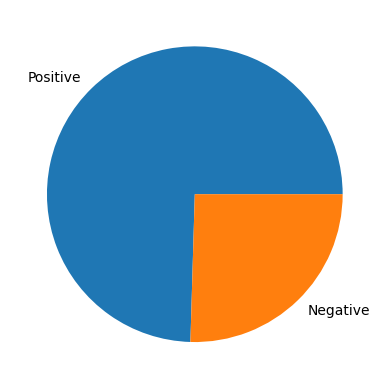

In [82]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

## Handle imbalanced dataset

In [83]:
!pip install imbalanced-learn

In [84]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9444, 1141) (9444,)


In [85]:
y_train_smote.value_counts()

label
1    4722
0    4722
Name: count, dtype: int64

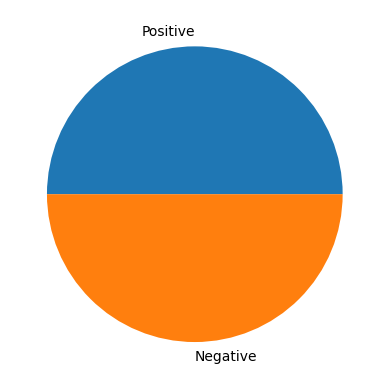

In [86]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [87]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9444, 1141), dtype=float32)

In [88]:
y_train_smote

0       1
1       0
2       1
3       0
4       1
       ..
9439    1
9440    1
9441    1
9442    1
9443    1
Name: label, Length: 9444, dtype: int64

In [89]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], shape=(1584, 1141), dtype=float32)

In [90]:
y_test

567     1
2858    0
6604    0
1659    0
5333    1
       ..
2562    0
2292    0
5182    0
7431    0
157     0
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [92]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

## Logistic Regression

In [93]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy = 0.939
	Precision = 0.915
	Recall = 0.967
	F1-Score = 0.94
Testing Scores:
	Accuracy = 0.872
	Precision = 0.713
	Recall = 0.854
	F1-Score = 0.777


## Naive Bayes

In [94]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.906
	Precision = 0.87
	Recall = 0.955
	F1-Score = 0.91
Testing Scores:
	Accuracy = 0.867
	Precision = 0.682
	Recall = 0.917
	F1-Score = 0.783


## Decision Tree

In [95]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.84
	Precision = 0.69
	Recall = 0.697
	F1-Score = 0.693


## Random Forest

In [96]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.88
	Precision = 0.791
	Recall = 0.733
	F1-Score = 0.761


## Support Vector Machine

In [97]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.962
	Recall = 0.996
	F1-Score = 0.979
Testing Scores:
	Accuracy = 0.886
	Precision = 0.756
	Recall = 0.833
	F1-Score = 0.792


In [98]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)